In [1]:
import sys
from pathlib import Path

# Add the 'backtest' directory to the system path
notebook_dir = Path().resolve()
backtest_dir = notebook_dir.parent / 'backtest'
sys.path.append(str(backtest_dir))

In [2]:
import pandas as pd
from backtest import Backtest, Strategy, TradeAction

In [ ]:
# First run the get_data.ipynb notebook to generate the data file
# or copy the code from get_data.ipynb here to download the data directly

# Read the OHLCV data from data/BTCUSDT.csv
data = pd.read_csv('data/BTCUSDT.csv', index_col='Date', parse_dates=True)

In [4]:
class SmaCrossStrategy(Strategy):

    def __init__(self):
        self.sma_short = 10
        self.sma_long = 40

    def on_candle(self, historical_data, positions_list):
        open_positions = [p for p in positions_list if p.exit_time is None]
        if self.has_positive_crossing(historical_data):
            # Open a long position
            trade_actions = [TradeAction(action="enter", quantity=1)]
            # Close any existing positions
            if len(open_positions) > 0:
                trade_actions += [
                    TradeAction(action="exit", position_id=pos.id)
                    for pos in open_positions
                ]
            return trade_actions
        elif self.has_negative_crossing(historical_data):
            # Open a short position
            trade_actions = [TradeAction(action="enter", quantity=-1)]
            # Close any existing positions
            if len(open_positions) > 0:
                trade_actions += [
                    TradeAction(action="exit", position_id=pos.id)
                    for pos in open_positions
                ]
            return trade_actions
        return []

    def has_positive_crossing(self, df: pd.DataFrame) -> bool:
        if len(df) < self.sma_long:
            return False
        df = df.copy()
        df.loc[:, "sma_short"] = df["Close"].rolling(window=self.sma_short).mean()
        df.loc[:, "sma_long"] = df["Close"].rolling(window=self.sma_long).mean()
        last_data = df.iloc[-1]
        prev_data = df.iloc[-2]
        return (last_data["sma_short"] > last_data["sma_long"]) & (
            prev_data["sma_short"] <= prev_data["sma_long"]
        )

    def has_negative_crossing(self, df: pd.DataFrame) -> bool:
        if len(df) < self.sma_long:
            return False
        df = df.copy()
        df.loc[:, "sma_short"] = df["Close"].rolling(window=self.sma_short).mean()
        df.loc[:, "sma_long"] = df["Close"].rolling(window=self.sma_long).mean()
        last_data = df.iloc[-1]
        prev_data = df.iloc[-2]
        return (last_data["sma_short"] < last_data["sma_long"]) & (
            prev_data["sma_short"] >= prev_data["sma_long"]
        )

In [6]:
backtest = Backtest(data, SmaCrossStrategy)

backtest.run()

backtest.pnl_df

Opening position: 1 units
Opening position: -1 units
Closing position: 1
Opening position: 1 units
Closing position: 2
Opening position: -1 units
Closing position: 3
Opening position: 1 units
Closing position: 4
Opening position: -1 units
Closing position: 5
Opening position: 1 units
Closing position: 6
Opening position: -1 units
Closing position: 7
Opening position: 1 units
Closing position: 8
Opening position: -1 units
Closing position: 9
Opening position: 1 units
Closing position: 10
Opening position: -1 units
Closing position: 11
Opening position: 1 units
Closing position: 12
Opening position: -1 units
Closing position: 13
Opening position: 1 units
Closing position: 14
Opening position: -1 units
Closing position: 15
Opening position: 1 units
Closing position: 16
Opening position: -1 units
Closing position: 17
Opening position: 1 units
Closing position: 18
Opening position: -1 units
Closing position: 19
Opening position: 1 units
Closing position: 20
Opening position: -1 units
Closin

,Open,High,Low,Close,Volume,pos-1-pnl,pos-2-pnl,pos-3-pnl,pos-4-pnl,pos-5-pnl,...,pos-24-pnl,pos-25-pnl,pos-26-pnl,pos-27-pnl,pos-28-pnl,pos-29-pnl,pos-30-pnl,pos-31-pnl,pos-32-pnl,total_pnl
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,46216.93,47954.63,46208.37,47722.65,19604.46325,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
2022-01-02,47722.66,47990.00,46654.00,47286.18,18340.46040,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
2022-01-03,47286.18,47570.00,45696.00,46446.10,27662.07710,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
2022-01-04,46446.10,47557.54,45500.00,45832.01,35491.41360,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
2022-01-05,45832.01,47070.00,42500.00,43451.13,51784.11857,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-09,76322.42,83588.00,74620.00,82615.22,75488.28772,-5166.76,-4125.32,-3724.43,-3634.56,-2421.76,...,-8026.63,-6271.3,-1964.65,-11117.97,-6926.0,31351.03,-7032.54,-4886.82,13829.53,19961.50
2025-04-10,82615.22,82753.21,78464.36,79607.30,33284.80718,-5166.76,-4125.32,-3724.43,-3634.56,-2421.76,...,-8026.63,-6271.3,-1964.65,-11117.97,-6926.0,31351.03,-7032.54,-4886.82,16837.45,22969.42
2025-04-11,79607.30,84300.00,78969.58,83423.84,34435.43797,-5166.76,-4125.32,-3724.43,-3634.56,-2421.76,...,-8026.63,-6271.3,-1964.65,-11117.97,-6926.0,31351.03,-7032.54,-4886.82,13020.91,19152.88


In [7]:
stats = backtest.stats()

Backtest Statistics:
total_return: 17299.809999999998
max_drawdown: -46580.58
sharpe_ratio: 0.010265037321142765
num_trades: 32
win_rate: 0.28125
avg_win: 11423.59888888889
avg_loss: -3717.9382608695646


In [9]:
# Extract long positions (quantity >= 0 or value >= 0)
long_positions = [pos for pos in backtest.positions if pos.quantity >= 0]
# Create a series of long positions entry "Open" prices from backtest.pnl_df
long_entry_series = backtest.pnl_df.loc[[pos.entry_time for pos in long_positions], 'Open']

# Extract short positions (quantity < 0 or value < 0)
short_positions = [pos for pos in backtest.positions if pos.quantity < 0]
# Create a series of short position entry "Open" prices from backtest.pnl_df
short_entry_series = backtest.pnl_df.loc[[pos.entry_time for pos in short_positions], 'Open']

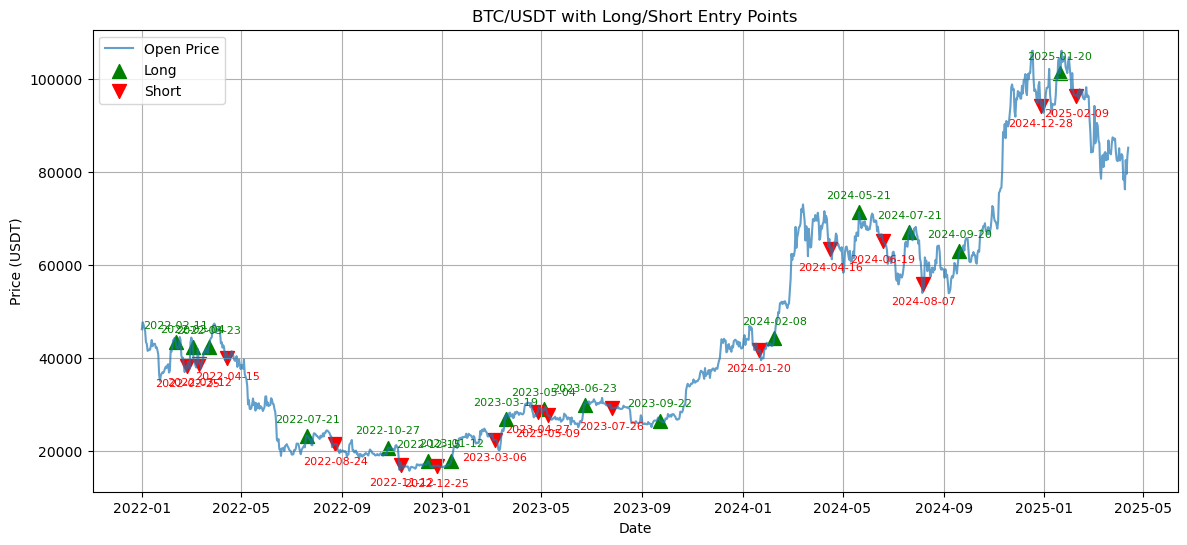

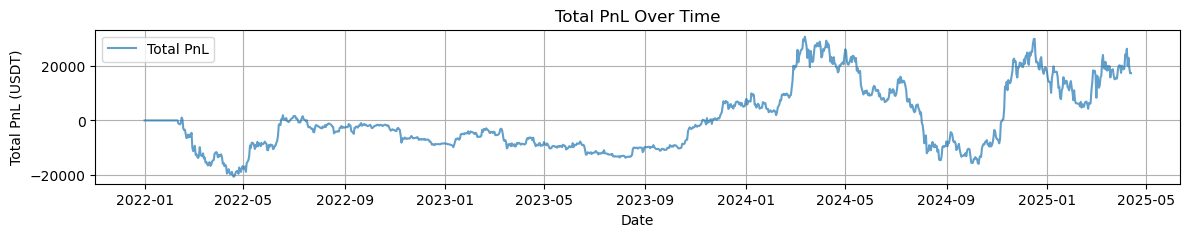

In [11]:
from matplotlib import pyplot as plt

df = backtest.pnl_df

plt.figure(figsize=(14, 6))
plt.plot(df['Open'], label="Open Price", alpha=0.7)

plt.scatter(long_entry_series.index, long_entry_series, marker='^', color="green", label="Long", s=100)

plt.scatter(short_entry_series.index, short_entry_series, marker='v', color="red", label="Short", s=100)

for idx, price in long_entry_series.items():
    plt.annotate(idx.strftime('%Y-%m-%d'), xy=(idx, price), xytext=(0, 10), 
                 textcoords='offset points', ha='center', fontsize=8, color='green')
    
for idx, price in short_entry_series.items():
    plt.annotate(idx.strftime('%Y-%m-%d'), xy=(idx, price), xytext=(0, -15), 
                 textcoords='offset points', ha='center', fontsize=8, color='red')

plt.title("BTC/USDT with Long/Short Entry Points")
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the Total PnL
plt.figure(figsize=(14, 2))
plt.plot(df['total_pnl'], label="Total PnL", alpha=0.7)
plt.title("Total PnL Over Time")
plt.xlabel('Date')
plt.ylabel('Total PnL (USDT)')
plt.legend()
plt.grid(True)
plt.show()